In [ ]:
#Importing necessary libraries
#Importing pandas for data manipulation and analysis
import pandas as pd
#Importing numpy for numeric calculations
import numpy as np
#Importing matplotlib for plotting
import matplotlib.pyplot as plt
#Importing seaborn for statistical data visualization
import seaborn as sns
#Importing linear regression model
from sklearn.linear_model import LinearRegression
from scipy import stats
#Importing k means algorithm from scilit-learn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
"""
 Loading the dataset
"""
df = pd.read_csv("/content/archive (3).zip")
df


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [ ]:
# top 5 rows of the dataset
df.head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
# Print the dimensions of the dataframe
df.shape

(113036, 18)

In [ ]:
cleaned = df.replace('?', np.nan)
#Remove rows with any missing values
cleaned = cleaned.dropna()
#Print the dimensions of the cleaned dataset
print(cleaned.shape)
#Display the statistics of the cleaned dataset
cleaned.describe()


(113036, 18)


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [ ]:
# Generate descriptive statistics for object columns
df.describe(include = 'object')

,Date,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product
count,113036,113036,113036,113036,113036,113036,113036,113036,113036
unique,1884,12,4,2,6,53,3,17,130
top,2016-03-01,June,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Water Bottle - 30 oz.
freq,288,11234,55824,58312,39206,22450,70120,33870,10794


In [ ]:
continuous_col = ['Date', 'Day', 'Month', 'Year', 'Customer_Age','Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue']
category_col = ['Age_Group','Customer_Gender','Country', 'State', 'Product_Category',
       'Sub_Category', 'Product',]
# Change data type from object to string and strip white space
df[category_col] = df[category_col].astype(str).apply(lambda x: x.str.strip())

# Displaying information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [ ]:
#Print column names
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [ ]:
#Count if there is any missing values
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [ ]:
#Count the frequency of the each unique value in the "Country" column
df['Country'].value_counts()

Country
United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: count, dtype: int64

In [ ]:
#Count the frequency of the each unique value in the "Sub_Category" column
df['Sub_Category'].value_counts()

Sub_Category
Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: count, dtype: int64

In [ ]:
#Count the frequency of the each unique value in the "Year" column
df['Year'].value_counts()


Year
2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: count, dtype: int64

In [ ]:
#Count the frequency of the each unique value in the "Product_Category" column
df['Product_Category'].value_counts()

Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64

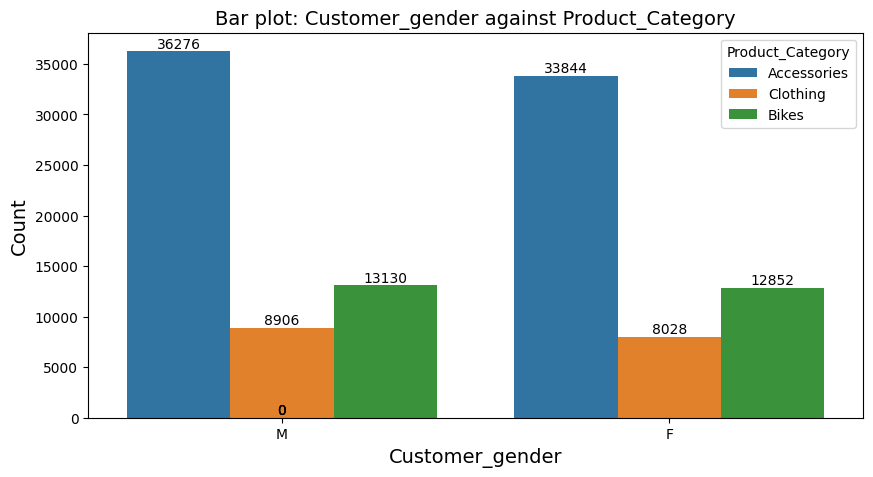

In [ ]:
#Plot the bar graph using customer_gender with product_category
def bar_plot(dataframe, x_variable):

    # Create a figure and axis object
    plt.figure(figsize=(10, 5))


    # Create the count plot with hue
    ax = sns.countplot(x=x_variable, hue='Product_Category', data=dataframe, order=dataframe[x_variable].value_counts().index)

    # Add annotations to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    # Set labels and title
    plt.xlabel(x_variable.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'Bar plot: {x_variable.capitalize()} against Product_Category', fontsize=14)

    # Show the plot
    plt.show()

# function call
bar_plot(cleaned, 'Customer_Gender')


In [ ]:
# Group the data by 'Customer_Gender' and 'Product_Category', then count the occurrences
gender_category_counts = cleaned.groupby(['Customer_Gender', 'Product_Category']).size()

# Print the counts
print(gender_category_counts)


Customer_Gender  Product_Category
F                Accessories         33844
                 Bikes               12852
                 Clothing             8028
M                Accessories         36276
                 Bikes               13130
                 Clothing             8906
dtype: int64


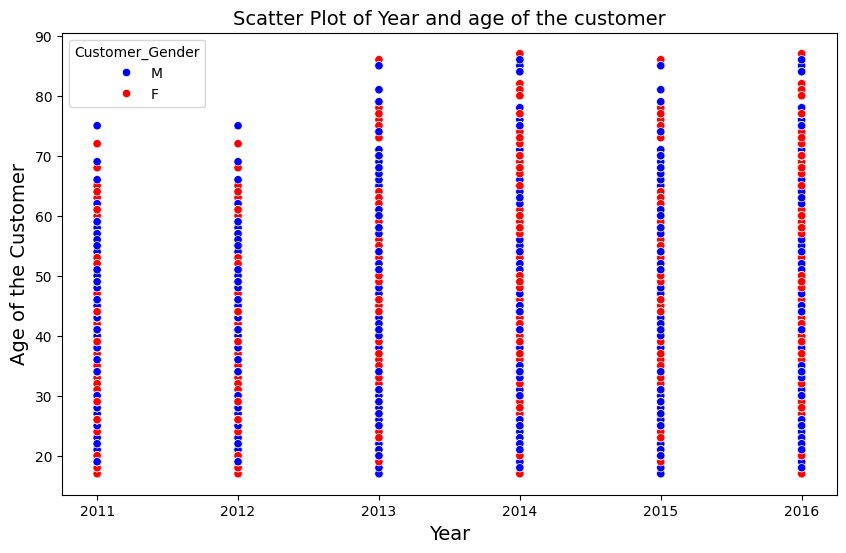

In [ ]:
#Plot the scatter plot using Year with Customer-Age
def scatterplot(dataframe):

    # creating the figure size.
    plt.figure(figsize=(10, 6))
    custom_palette = {'M': 'blue', 'F': 'red'}  # Specify colors for each category


    # Create the scatter plot
    sns.scatterplot(x='Year', y='Customer_Age', data=dataframe, hue='Customer_Gender', palette=custom_palette)

    # Set the both labels and title
    plt.xlabel('Year', fontsize = 14)
    plt.ylabel('Age of the Customer', fontsize = 14)
    plt.title('Scatter Plot of Year and age of the customer', fontsize = 14)

    # Show the plot
    plt.show()

# function calling
scatterplot(cleaned)

In [ ]:
# Convert columns to numeric data type
numeric_columns = ['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price','Profit','Cost','Revenue']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()


# Print correlation matrix
print(correlation_matrix)

                     Day      Year  Customer_Age  Order_Quantity  Unit_Cost  \
Day             1.000000 -0.007635     -0.014296       -0.002412   0.003133   
Year           -0.007635  1.000000      0.040994        0.123169  -0.217575   
Customer_Age   -0.014296  0.040994      1.000000        0.026887  -0.021374   
Order_Quantity -0.002412  0.123169      0.026887        1.000000  -0.515835   
Unit_Cost       0.003133 -0.217575     -0.021374       -0.515835   1.000000   
Unit_Price      0.003207 -0.213673     -0.020262       -0.515925   0.997894   
Profit          0.004623 -0.181525      0.004319       -0.238863   0.741020   
Cost            0.003329 -0.215604     -0.016013       -0.340382   0.829869   
Revenue         0.003853 -0.208673     -0.009326       -0.312895   0.817865   

                Unit_Price    Profit      Cost   Revenue  
Day               0.003207  0.004623  0.003329  0.003853  
Year             -0.213673 -0.181525 -0.215604 -0.208673  
Customer_Age     -0.020262  0.00

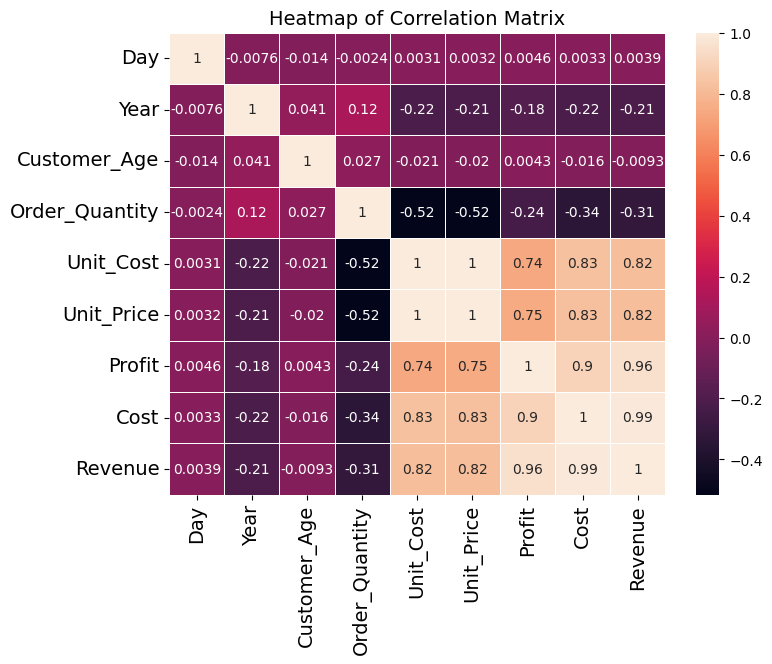

In [ ]:
#Plotting a heatmap of the confusion matrix
def plotting_heatmap(correlation_matrix):


  # Check if the correlation matrix is empty or has a size of zero
    if correlation_matrix.empty or correlation_matrix.size == 0:
        print("Correlation matrix is empty or has a size of zero.")
        return

    # Size of the figure
    plt.figure(figsize=(8, 6))
    # Generating the heatmap from the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt='.2g', linecolor='white')
    # Creating a title for the plot
    plt.title('Heatmap of Correlation Matrix', fontsize=14)
    # Adding the x and y ticks for the plot
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

# Call the function
plotting_heatmap(correlation_matrix)

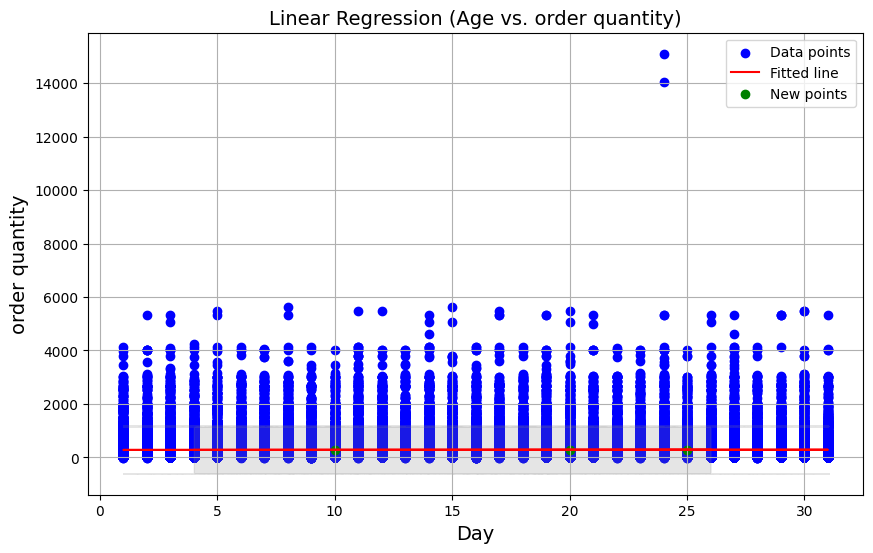

Slope: 0.23895725634054885
Intercept: 281.30821971952025
Confidence Interval (95%): 889.5991249243924


In [ ]:
def line_fitting(x, y, new_points=None):
    """
    Perform linear fitting, visualize the fitted line with confidence interval, and predict new data points.

    Parameters:
        x : Independent variable (x-axis).
        y : Dependent variable (y-axis).
        new_points : New points to be predicted (optional).

    Returns:
        tuple: Tuple containing slope, intercept, and confidence interval of the fitted line.
    """
    # Simple imputation: Fill missing values with mean
    x_mean = np.nanmean(x)
    y_mean = np.nanmean(y)
    x_filled = np.where(np.isnan(x), x_mean, x)
    y_filled = np.where(np.isnan(y), y_mean, y)

    # Reshape the data if needed
    x_filled = np.array(x_filled).reshape(-1, 1)
    y_filled = np.array(y_filled)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(x_filled, y_filled)

    # Extract the slope and intercept from the model
    m = model.coef_[0]
    b = model.intercept_

    # Generate predicted y-values based on the fitted line
    y_pred = model.predict(x_filled)

    # Calculate residuals
    residuals = y_filled - y_pred

    # Calculate standard deviation of residuals
    std_residuals = np.std(residuals)

    # Calculate t-value for a 95% confidence interval
    t_value = stats.t.ppf(0.975, df=len(x_filled) - 2)

    # Calculate confidence interval for each point
    confidence_interval = t_value * std_residuals

    # Plot the figure
    plt.figure(figsize=(10, 6))

    # Plot data points
    plt.scatter(x_filled, y_filled, color='blue', label='Data points')

    # Plot fitted line
    plt.plot(x_filled, y_pred, color='red', label='Fitted line')

    # Plot confidence interval
    plt.fill_between(x_filled.flatten(), y_pred - confidence_interval, y_pred + confidence_interval, color='gray', alpha=0.2)

    # Plot new points if provided
    if new_points:
        new_points_pred = model.predict(np.array(new_points).reshape(-1, 1))
        plt.scatter(new_points, new_points_pred, color='green', label='New points')

    # Add labels and title
    plt.xlabel('Day', fontsize=14)
    plt.ylabel('order quantity', fontsize=14)
    plt.title('Linear Regression (Age vs. order quantity)', fontsize=14)

    # Add legend and grid
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

    return m, b, confidence_interval

# Independent variable (x-axis)
x = df['Day'].values
# Dependent variable (y-axis)
y = df['Profit'].values

# New points to predict
new_points = [10, 20, 25]

# Fitting the best fit line, plotting with confidence interval, and predicting new data points
slope, intercept, confidence_interval = line_fitting(x, y, new_points)

# Printing the slope, intercept, and confidence interval
print("Slope:", slope)
print("Intercept:", intercept)
print("Confidence Interval (95%):", confidence_interval)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

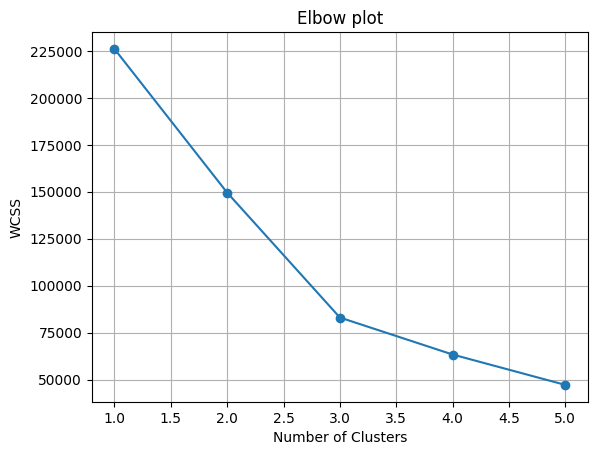

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


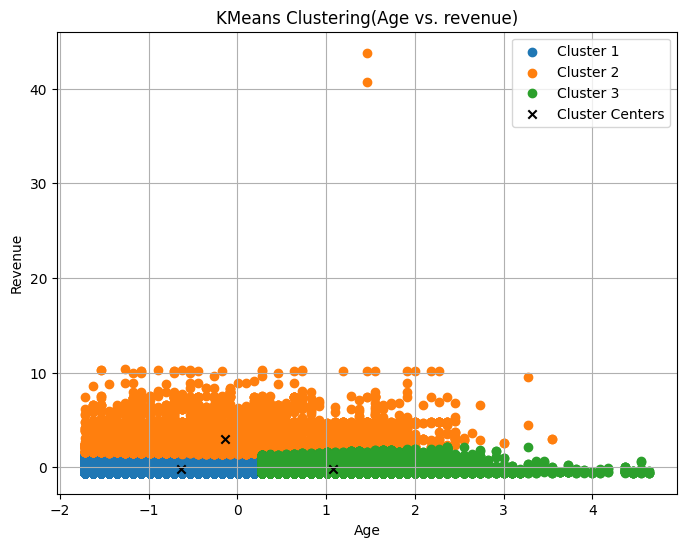

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


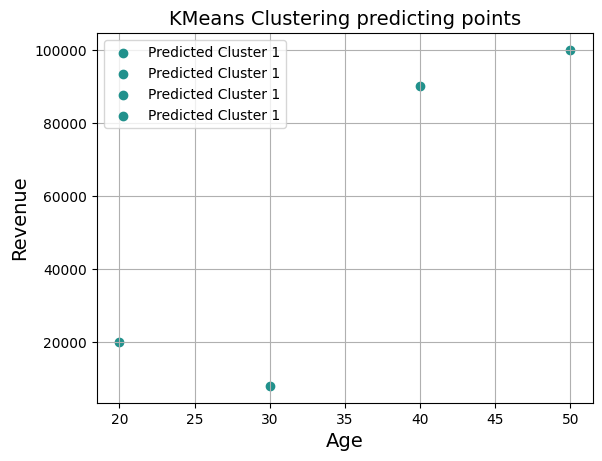

Predicted labels for new data points: [1 1 1 1]


In [ ]:
# Global variable for scaler
scaler = StandardScaler()

def Standardization_data(df):
    """
    Rescaling the 'Customer_age' and 'Revenue' columns in the same ratio.

    Parameters:
        data: DataFrame containing 'Customer_age' and 'Revenue' columns.

    Return:
        ndarray: Rescaled data values.
    """
    return scaler.fit_transform(df[['Customer_Age', 'Revenue']])

def performing_elbow_method(data_scaled):
    """
    Calculate the optimal number of clusters using the elbow method.

    Parameters:
        data_scaled: Rescaled data.

    Returns:
        integer: Optimal number of clusters.
    """
    # within cluster sum of squares
    wcss = []
    # Adjusted range to avoid ValueError
    for i in range(1, 6):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)
    # Plotting the within-cluster sum of squares
    plt.plot(range(1, 6), wcss, marker='o')
    # Adding labels and title to the plot
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow plot')
    # Adding grid
    plt.grid(True)
    plt.show()
    return 3

def visualize_clusters(data_scaled, optimal_num_clusters):
    """
    Visualizing the clusters based on the number of clusters.

    Parameters:
        data_scaled: Rescaled data.
        optimal_num_clusters: Optimal number of clusters.
    """
    kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)
    cluster_centers = kmeans.cluster_centers_
    # Plotting the clusters
    plt.figure(figsize=(8, 6))
    for cluster_label in range(optimal_num_clusters):
        plt.scatter(data_scaled[cluster_labels == cluster_label, 0],
                    data_scaled[cluster_labels == cluster_label, 1],
                    label=f'Cluster {cluster_label + 1}')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', label='Cluster Centers')
    # Adding labels and title to the plot
    plt.xlabel('Age')
    plt.ylabel('Revenue')
    plt.title('KMeans Clustering(Age vs. revenue)')
    plt.legend()
    # Adding grid
    plt.grid(True)
    plt.show()

def predicting_new_data_points(X, kmeans):
    """
    Predicts cluster labels for new data points.

    Parameters:
        X (ndarray): New data points.
        kmeans (KMeans): Trained KMeans model.

    Returns:
        ndarray: Predicted cluster labels for new data points.
    """
    scaled_X = scaler.transform(X)
    return kmeans.predict(scaled_X)

# Preprocessing the data
data_scaled = Standardization_data(df)

# Performing the elbow method to determine the optimal number of clusters
optimal_num_clusters = performing_elbow_method(data_scaled)

# Performing KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(data_scaled)

# Visualizing the clusters
visualize_clusters(data_scaled, optimal_num_clusters)

# Sample data for prediction
X_new = np.array([[20, 20000], [30, 8000], [40, 90000], [50, 100000]])

# Predict cluster labels for new data points
predicted_labels = predicting_new_data_points(X_new, kmeans)

# Generate colors randomly based on the number of clusters
colors = plt.cm.viridis(np.linspace(0, 1, optimal_num_clusters))

# Plot the new data points with colors corresponding to their predicted clusters
for i, label in enumerate(predicted_labels):
    plt.scatter(X_new[i, 0], X_new[i, 1], color=colors[label], label=f'Predicted Cluster {label}')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title('KMeans Clustering predicting points', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print predicted labels for new data points
print("Predicted labels for new data points:", predicted_labels)


In [ ]:
# Calculate summary statistics for the DataFrame 'df'
summary_stats = df.describe()

# Print the summary statistics
print(summary_stats)

                 Day           Year   Customer_Age  Order_Quantity  \
count  113036.000000  113036.000000  113036.000000   113036.000000   
mean       15.665753    2014.401739      35.919212       11.901660   
std         8.781567       1.272510      11.021936        9.561857   
min         1.000000    2011.000000      17.000000        1.000000   
25%         8.000000    2013.000000      28.000000        2.000000   
50%        16.000000    2014.000000      35.000000       10.000000   
75%        23.000000    2016.000000      43.000000       20.000000   
max        31.000000    2016.000000      87.000000       32.000000   

           Unit_Cost     Unit_Price         Profit           Cost  \
count  113036.000000  113036.000000  113036.000000  113036.000000   
mean      267.296366     452.938427     285.051665     469.318695   
std       549.835483     922.071219     453.887443     884.866118   
min         1.000000       2.000000     -30.000000       1.000000   
25%         2.000000    

In [ ]:
def mean_for_columns():

  """
    Calculating mean of the columns, using loop.
    Mean(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    mean_value = df[i].mean()
    print("Mean value of", i, ":", mean_value)

all_columns = ['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price','Profit','Cost','Revenue']
mean_for_columns()



Mean value of Day : 15.665752503627163
Mean value of Year : 2014.4017392689054
Mean value of Customer_Age : 35.91921157861212
Mean value of Order_Quantity : 11.901659648253654
Mean value of Unit_Cost : 267.296365759581
Mean value of Unit_Price : 452.9384266959199
Mean value of Profit : 285.0516649562971
Mean value of Cost : 469.3186949290492
Mean value of Revenue : 754.3703598853463


In [ ]:
def median_for_columns():

  """
    Calculating median of the columns, using loop.
    median(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    median_value = df[i].median()
    print("median value of", i, ":", median_value)

all_columns = ['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price','Profit','Cost','Revenue']
median_for_columns()


median value of Day : 16.0
median value of Year : 2014.0
median value of Customer_Age : 35.0
median value of Order_Quantity : 10.0
median value of Unit_Cost : 9.0
median value of Unit_Price : 24.0
median value of Profit : 101.0
median value of Cost : 108.0
median value of Revenue : 223.0


In [ ]:
def standard_deviation_for_columns():

  """
    Calculating standard deviation of the columns, using loop.
    standard_deviation(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    standard_deviation_value = df[i].std()
    print("Standard Deviation of", i, ":", standard_deviation_value)

all_columns = ['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price','Profit','Cost','Revenue']
standard_deviation_for_columns()

Standard Deviation of Day : 8.781566778213012
Standard Deviation of Year : 1.2725103861593707
Standard Deviation of Customer_Age : 11.021935623682777
Standard Deviation of Order_Quantity : 9.561856759549377
Standard Deviation of Unit_Cost : 549.8354831075126
Standard Deviation of Unit_Price : 922.0712193270648
Standard Deviation of Profit : 453.88744305571424
Standard Deviation of Cost : 884.8661177053633
Standard Deviation of Revenue : 1309.094673526968


In [ ]:
def skewness_for_columns():

  """
    Calculating skewness of the columns, using loop.
    skew(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    skewness_value = df[i].skew()
    print("skewness of", i, ":", skewness_value)

all_columns = ['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price','Profit','Cost','Revenue']
skewness_for_columns()

skewness of Day : 0.01372201285962089
skewness of Year : -0.37112036810403015
skewness of Customer_Age : 0.5253002710725994
skewness of Order_Quantity : 0.3781792744116754
skewness of Unit_Cost : 2.1115484045760655
skewness of Unit_Price : 2.0880413908486926
skewness of Profit : 4.00266183726777
skewness of Cost : 5.083239348566859
skewness of Revenue : 4.670907765487898


In [ ]:
def kurtosis_for_columns():

  """
    Calculating kurtosis of the columns, using loop.
    kurtosis(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    kurtosis_value = df[i].kurtosis()
    print("kurtosis of", i, ":", kurtosis_value)

all_columns = ['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price','Profit','Cost','Revenue']
kurtosis_for_columns()

kurtosis of Day : -1.1900823861368324
kurtosis of Year : -0.511186350603523
kurtosis of Customer_Age : -0.11887349634583444
kurtosis of Order_Quantity : -1.2318761257216888
kurtosis of Unit_Cost : 3.3382505833884624
kurtosis of Unit_Price : 3.1499842611857742
kurtosis of Profit : 35.37104990077343
kurtosis of Cost : 97.50878369930501
kurtosis of Revenue : 72.37154543004694
